In [1]:
Base.chr2ind(m::IJulia.Msg, str::String, ic::Int64) = Base.chr2ind(m, str, Int32(ic))

# Uniform distribution over the boundary of the cell

In [2]:
using DynamicalBilliards
DynamicalBilliards.enableplotting()

using PyPlot

## Hexagonal cell (Infinite-Horizon regime)

In [9]:
space = 3.0 # Space between two adjacent disks
r = 1.0 # Radius of the disk

polygon_sides = 6

bth = billiard_polygon(polygon_sides, space/sqrt(3); setting = "periodic")
d = Disk([0.,0.], r)
push!(bth, d)

t = 10.0
Npart = 20000 ;

In [10]:
birkres = birkhoff_visual(t, Npart, bth ,polygon_sides; lyapunov = true);

In [11]:
s = birkres[:,1];
sintheta = birkres[:,2];
distances = birkres[:,3];
lyapunov = birkres[:,4];

## Distances

In [4]:
time = linspace(0.5,10.0,5)

0.5:2.375:10.0

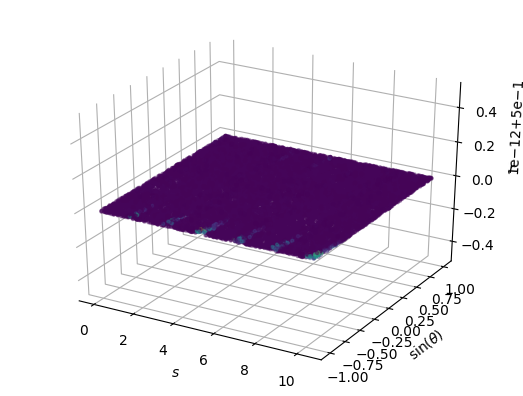

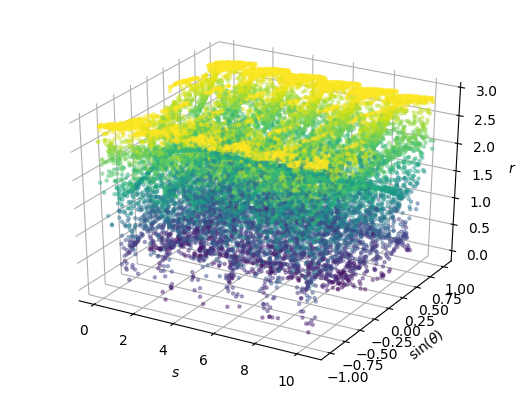

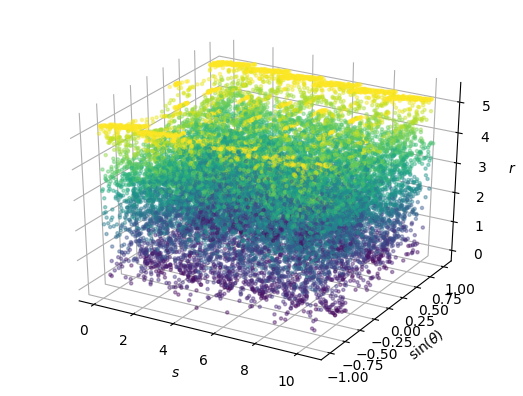

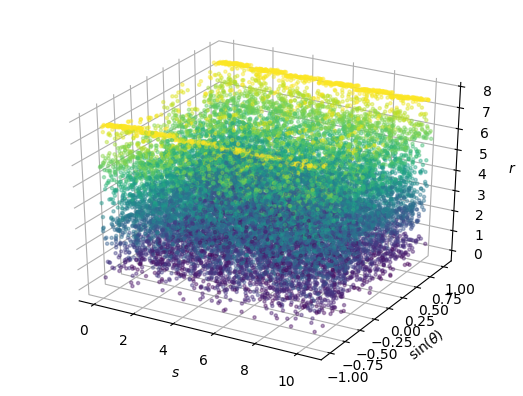

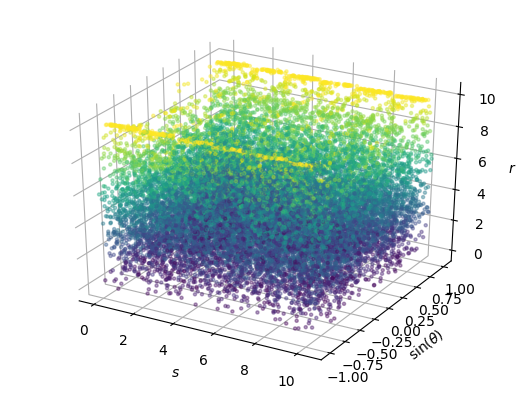

In [5]:
for t in time
Npart = 20000 ;
birkres = birkhoff_visual(t, Npart, bth ,polygon_sides; lyapunov = true);
s = birkres[:,1];
sintheta = birkres[:,2];
distances = birkres[:,3];
lyapunov = birkres[:,4];

## Scatter
fig = plt[:figure]()
ax = fig[:add_subplot](111, projection="3d")
ax[:scatter](s,sintheta, distances, c=distances, s=5, alpha = 0.4)
ax[:w_xaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_yaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_zaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
    
ax[:set_xlabel](L"$s$")
ax[:set_ylabel](L"$\sin(\theta)$")
ax[:set_zlabel](L"$r$")

end

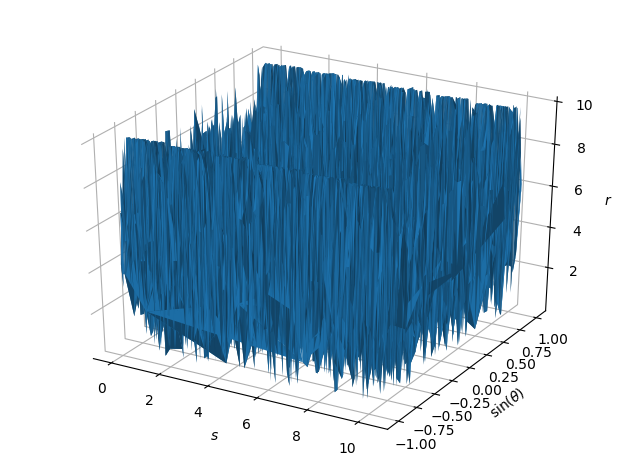

PyObject <matplotlib.text.Text object at 0xcff0480c>

In [12]:
## Density

fig = plt[:figure]()
ax = fig[:add_subplot](111, projection="3d")
surf = ax[:plot_trisurf](s,sintheta,distances)
fig[:tight_layout]()
ax[:w_xaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_yaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_zaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))

ax[:set_xlabel](L"$s$")
ax[:set_ylabel](L"$\sin(\theta)$")
ax[:set_zlabel](L"$r$")

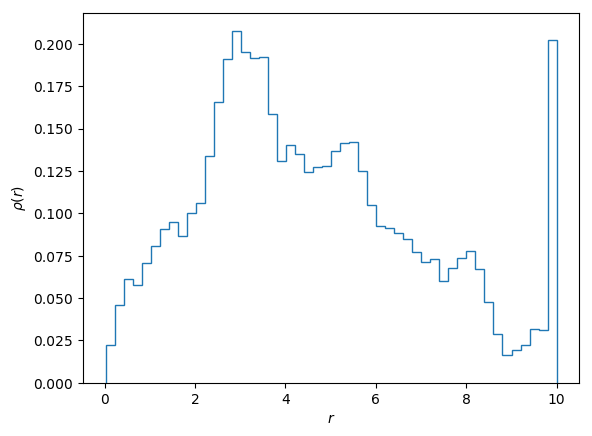

PyObject <matplotlib.text.Text object at 0xd1b1654c>

In [13]:
## Histogram
plt[:hist](distances, normed = true, 50, histtype = "step");
plt[:xlabel](L"$r$")
plt[:ylabel](L"$\rho(r)$")

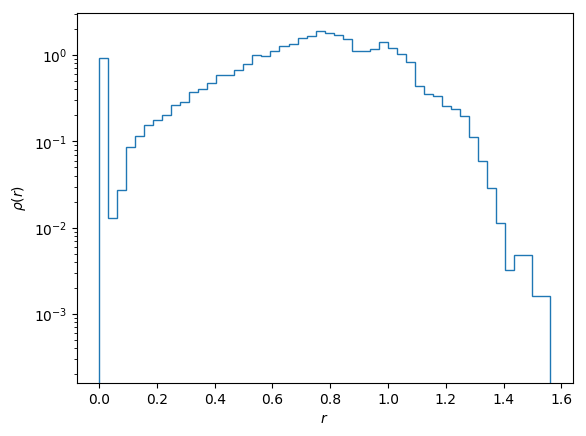

PyObject <matplotlib.text.Text object at 0xd1f87bac>

In [14]:
## Histogram -Logarithmic scale
plt[:hist](lyapunov, normed = true, 50, histtype = "step", log = true);
plt[:xlabel](L"$r$")
plt[:ylabel](L"$\rho(r)$")

### Lyapunov Exponents

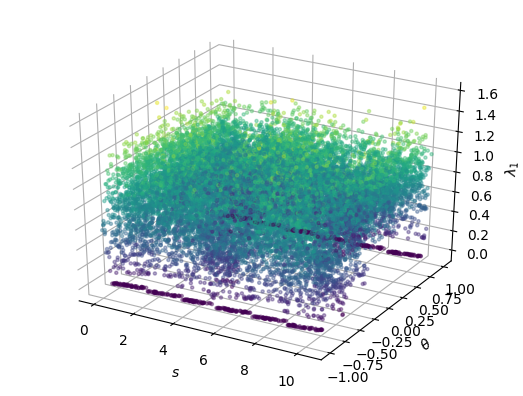

PyObject <matplotlib.text.Text object at 0xd3128e0c>

In [15]:
## Scatter

fig = plt[:figure]()
ax = fig[:add_subplot](111, projection="3d")
ax[:scatter](s, sintheta, lyapunov, c=lyapunov, s=5, alpha = 0.4)
ax[:w_xaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_yaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_zaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))

ax[:set_xlabel](L"$s$")
ax[:set_ylabel](L"$\theta$")
ax[:set_zlabel](L"$\lambda_1$")

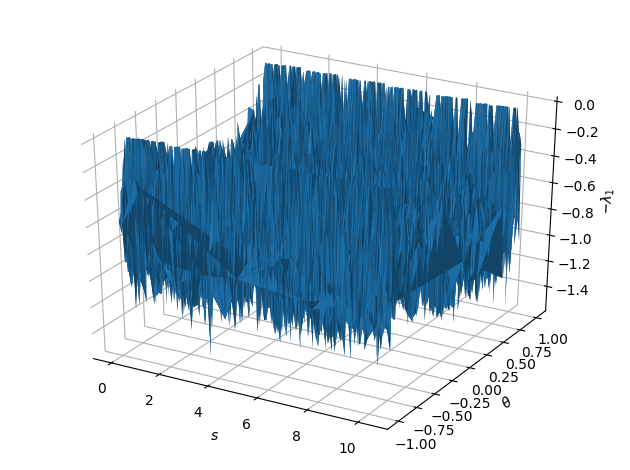

PyObject <matplotlib.text.Text object at 0xcc0af22c>

In [16]:
## Density (-λ_1)

fig = plt[:figure]()
ax = fig[:add_subplot](111, projection="3d")
surf = ax[:plot_trisurf](s,sintheta,-1.*lyapunov, linewidth = 0)
fig[:tight_layout]()
ax[:w_xaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_yaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_zaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))

ax[:set_xlabel](L"$s$")
ax[:set_ylabel](L"$\theta$")
ax[:set_zlabel](L"$-\lambda_1$")

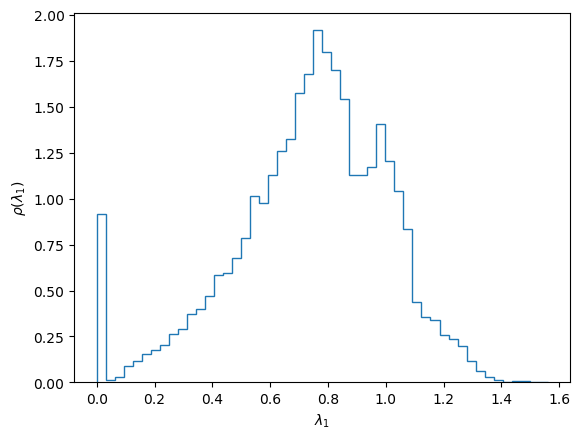

In [17]:
## Histogram
plt[:hist](lyapunov, normed = true, 50, histtype = "step");
plt[:xlabel](L"$\lambda_1$")
plt[:ylabel](L"$\rho(\lambda_1)$");


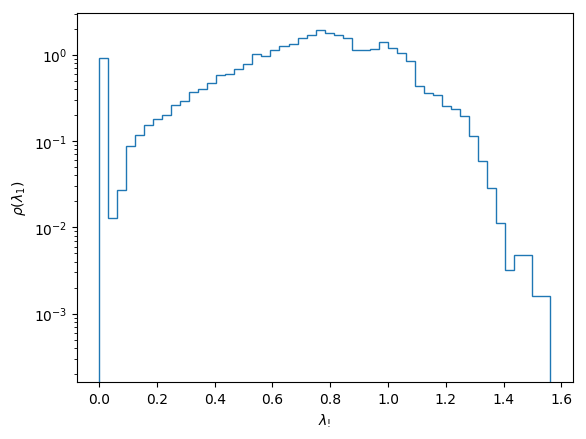

In [18]:
## Histogram
plt[:hist](lyapunov, normed = true, 50, histtype = "step", log = true);
plt[:xlabel](L"$\lambda_!$")
plt[:ylabel](L"$\rho(\lambda_1)$");

## Comparison

In [19]:
rare = birkres[find(lyapunov .< 0.1),:] #Distance is the third column

604×4 Array{Float64,2}:
 7.24056   -0.878168  10.0      0.0      
 9.41608   -0.885588  10.0      0.0      
 3.59415    0.831489  10.0      0.0      
 8.88963   -0.889176  10.0      0.0      
 7.19448    0.500708   6.2415   0.0583111
 5.41647    0.841247  10.0      0.0      
 8.36732   -0.8511    10.0      0.0      
 9.04531    0.84496   10.0      0.0      
 7.32785   -0.891593  10.0      0.0      
 7.56656   -0.869985  10.0      0.0      
 0.272217   0.849381  10.0      0.0      
 9.07909    0.848509  10.0      0.0      
 4.6003    -0.865784  10.0      0.0      
 ⋮                                       
 7.14251    0.499243   3.14193  0.0781232
 2.17082   -0.887555  10.0      0.0      
 4.08684   -0.879936  10.0      0.0      
 3.11931   -0.856276  10.0      0.0      
 7.53738    0.865325  10.0      0.0      
 9.53438   -0.863799  10.0      0.0      
 4.30175    0.858787  10.0      0.0      
 5.51235   -0.881912  10.0      0.0      
 1.20367   -0.845456  10.0      0.0      
 4.17505  

We can note that rare events with vanishing Lyapunov exponents have the 
highest values of displacements. It is worth noting that 3 rare values occur at a similar angle

## Hexagonal cell (Finite-Horizon regime)

In [20]:
space = 2.2 # Space between two adjacent disks
r = 1.0 # Radius of the disk

polygon_sides = 6

bth = billiard_polygon(polygon_sides, space/sqrt(3); setting = "periodic")
d = Disk([0.,0.], r)
push!(bth, d)

t = 0.2
Npart = 20000 ;

In [22]:
t = 0.2
Npart = 20000 ;
birkres = birkhoff_visual(t, Npart, bth ,polygon_sides; lyapunov = true);
s = birkres[:,1];
sintheta = birkres[:,2];
distances = birkres[:,3];
lyapunov = birkres[:,4];

## Distances

In [24]:
time = linspace(0.2,10.0,20)

0.2:0.5157894736842106:10.0

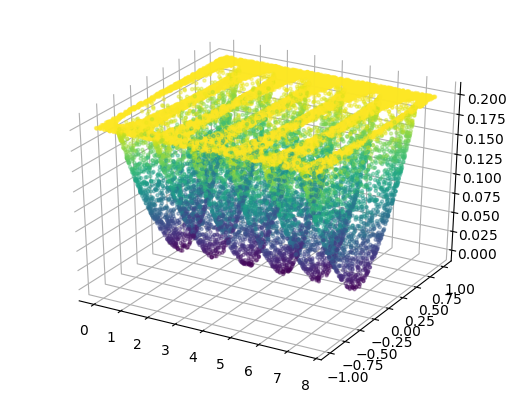

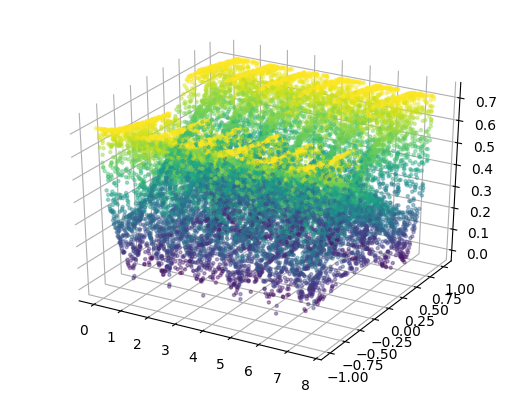

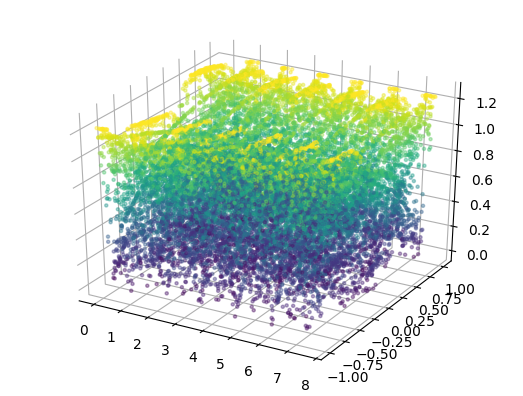

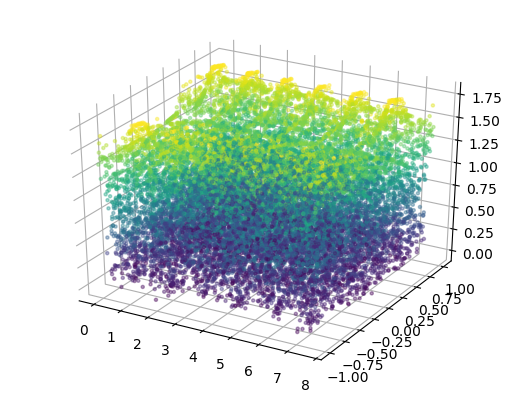

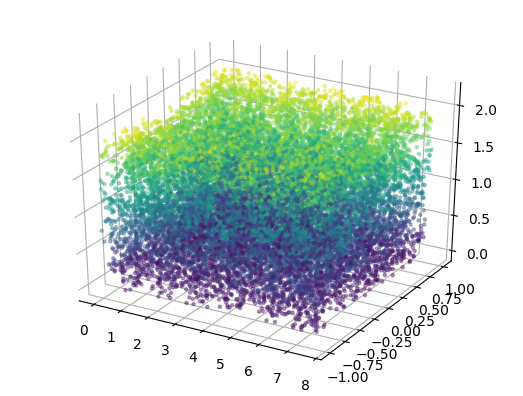

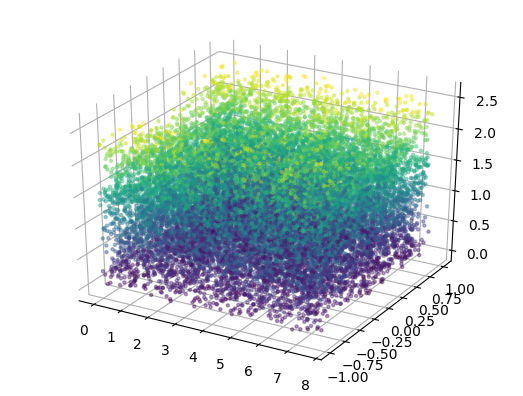

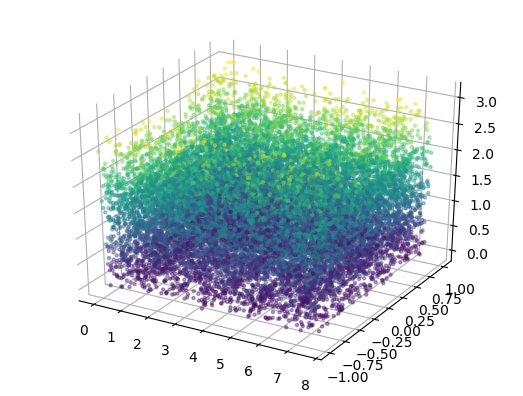

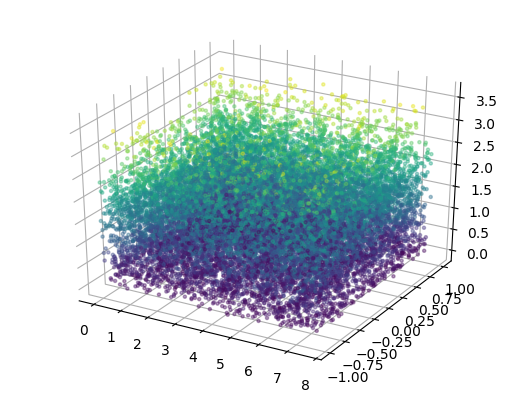

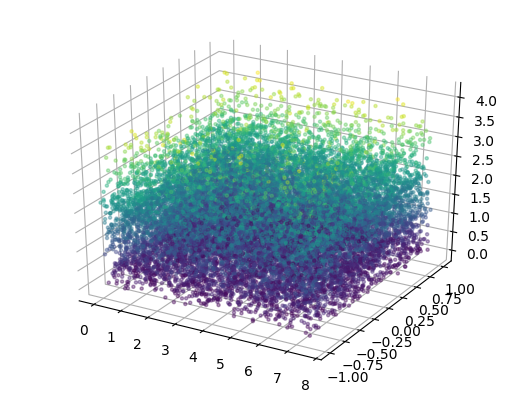

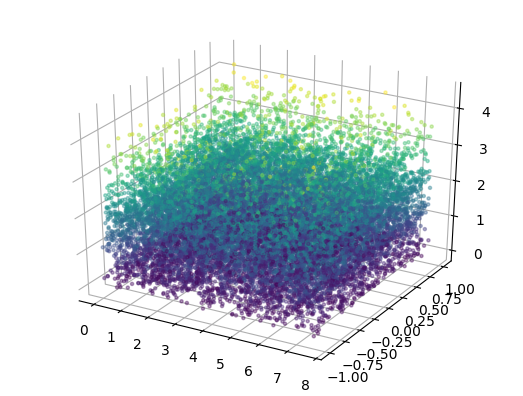

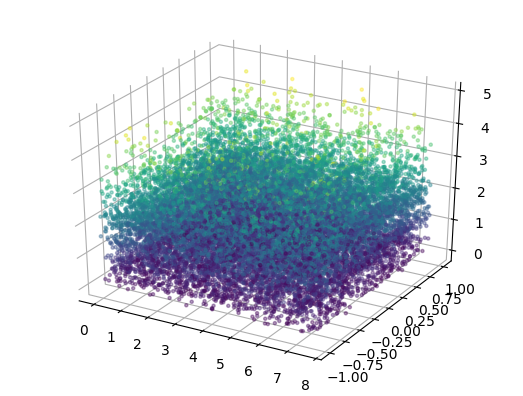

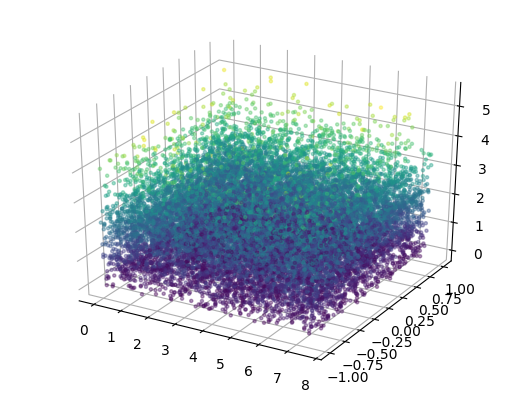

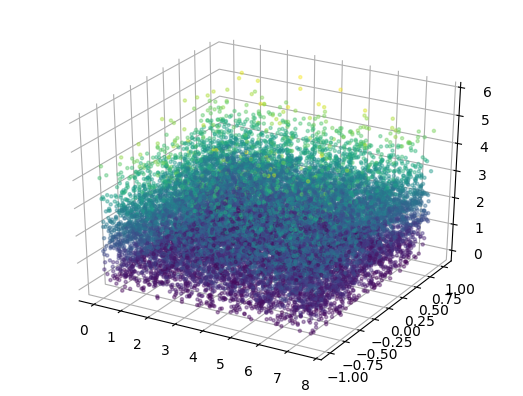

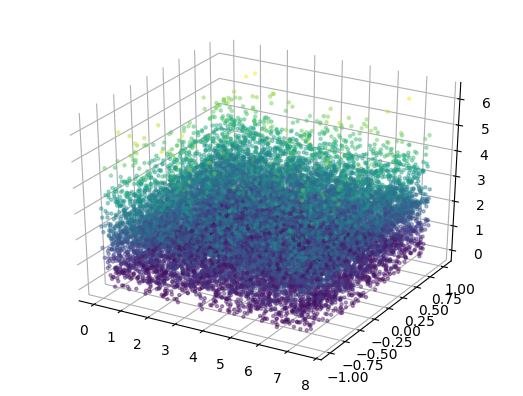

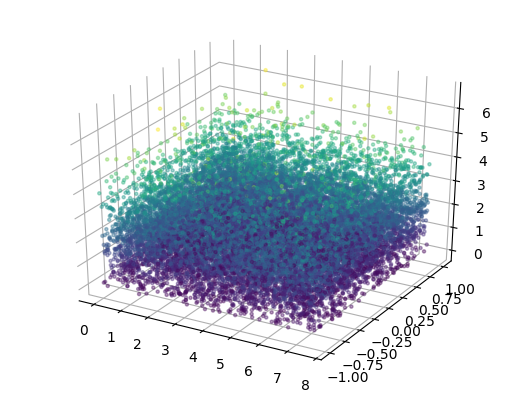

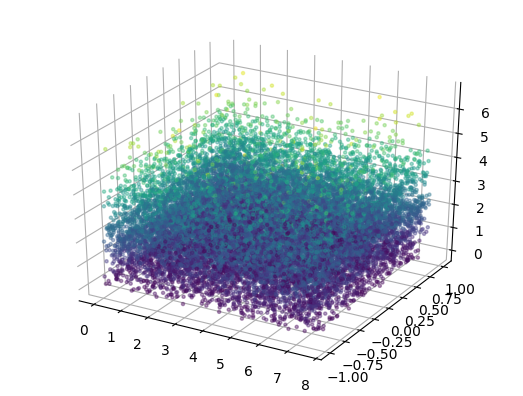

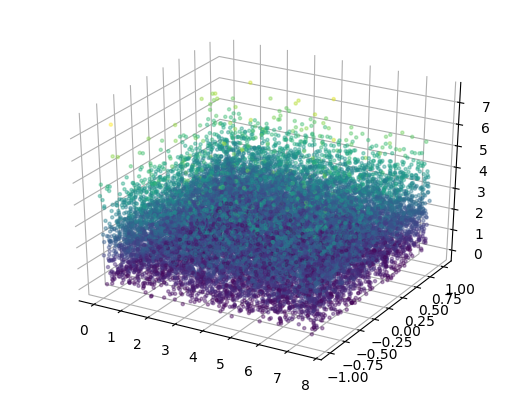

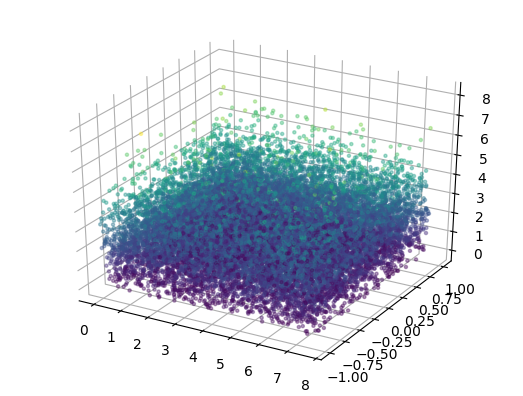

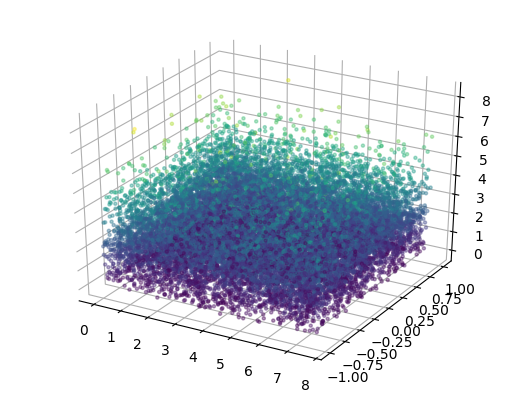

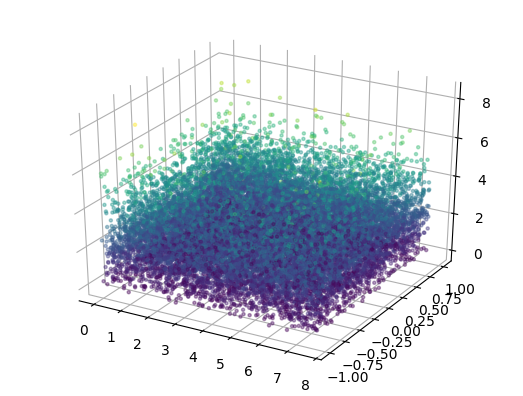

In [25]:
for t in time
Npart = 20000 ;
birkres = birkhoff_visual(t, Npart, bth ,polygon_sides; lyapunov = true);
s = birkres[:,1];
sintheta = birkres[:,2];
distances = birkres[:,3];
lyapunov = birkres[:,4];

## Scatter
fig = plt[:figure]()
ax = fig[:add_subplot](111, projection="3d")
ax[:scatter](s,sintheta, distances, c=distances, s=5, alpha = 0.4)
ax[:w_xaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_yaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_zaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))

end

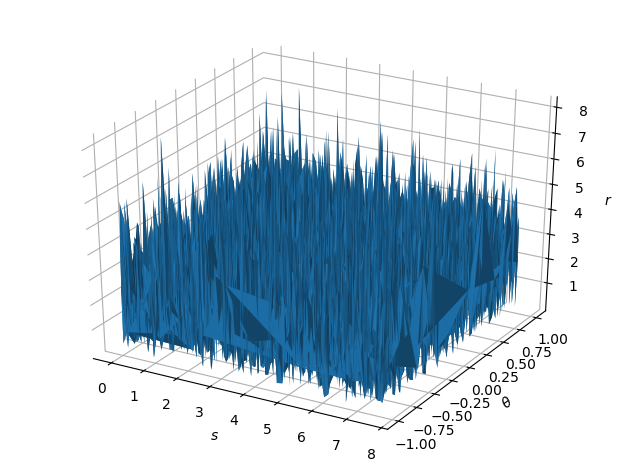

PyObject <matplotlib.text.Text object at 0xcc0ed12c>

In [26]:
## Density

fig = plt[:figure]()
ax = fig[:add_subplot](111, projection="3d")
surf = ax[:plot_trisurf](s,sintheta,distances)
fig[:tight_layout]()
ax[:w_xaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_yaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_zaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))

ax[:set_xlabel](L"$s$")
ax[:set_ylabel](L"$\theta$")
ax[:set_zlabel](L"$r$")

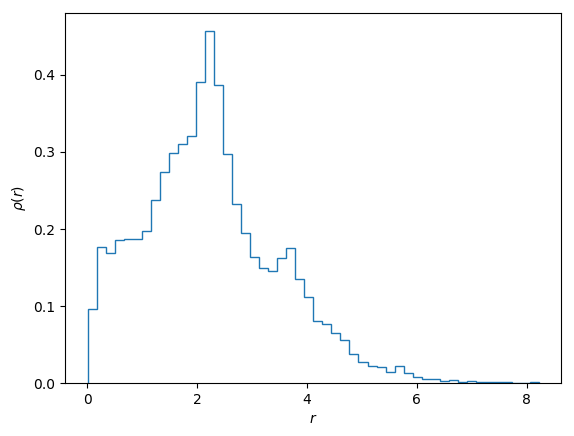

PyObject <matplotlib.text.Text object at 0xb9bb63cc>

In [27]:
## Histogram
plt[:hist](distances, normed = true, 50, histtype = "step");
plt[:xlabel](L"$r$")
plt[:ylabel](L"$\rho(r)$")

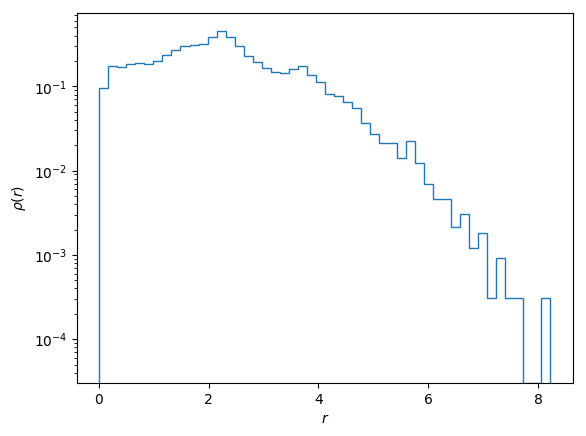

PyObject <matplotlib.text.Text object at 0xbb06c6ac>

In [28]:
## Histogram -Logarithmic scale
plt[:hist](distances, normed = true, 50, histtype = "step", log = true);
plt[:xlabel](L"$r$")
plt[:ylabel](L"$\rho(r)$")

### Lyapunov Exponents

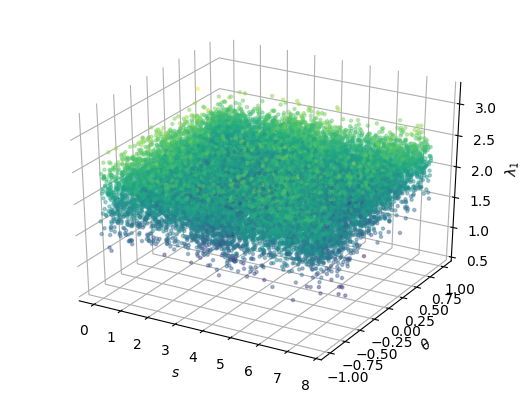

PyObject <matplotlib.text.Text object at 0xbad3a82c>

In [29]:
## Scatter

fig = plt[:figure]()
ax = fig[:add_subplot](111, projection="3d")
ax[:scatter](s, sintheta, lyapunov, c= lyapunov, s=5, alpha = 0.4)
ax[:w_xaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_yaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_zaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))

ax[:set_xlabel](L"$s$")
ax[:set_ylabel](L"$\theta$")
ax[:set_zlabel](L"$\lambda_1$")

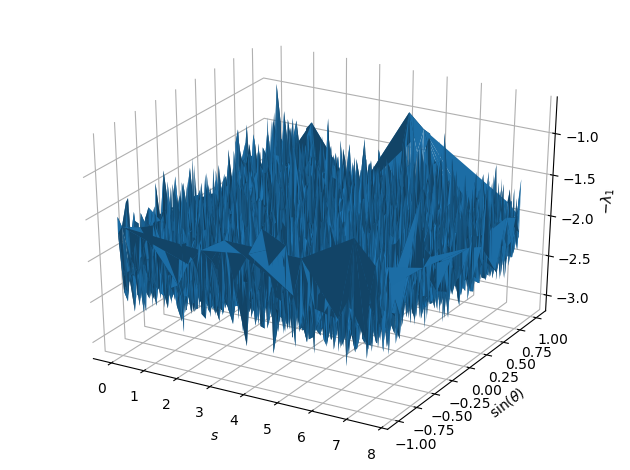

PyObject <matplotlib.text.Text object at 0xba41f7cc>

In [31]:
## Density (-λ_1)

fig = plt[:figure]()
ax = fig[:add_subplot](111, projection="3d")
surf = ax[:plot_trisurf](s,sintheta,-1.*lyapunov, linewidth = 0)
fig[:tight_layout]()
ax[:w_xaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_yaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))
ax[:w_zaxis][:set_pane_color]((1.0, 1.0, 1.0, 1.0))

ax[:set_xlabel](L"$s$")
ax[:set_ylabel](L"$\sin(\theta)$")
ax[:set_zlabel](L"$-\lambda_1$")

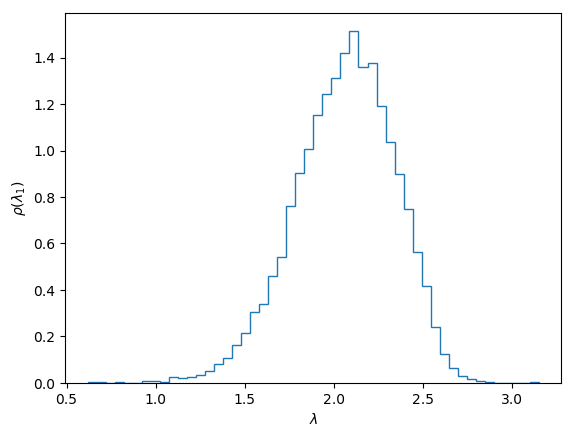

In [32]:
## Histogram
plt[:hist](lyapunov, normed = true, 50, histtype = "step");
plt[:xlabel](L"$\lambda$")
plt[:ylabel](L"$\rho(\lambda_1)$");


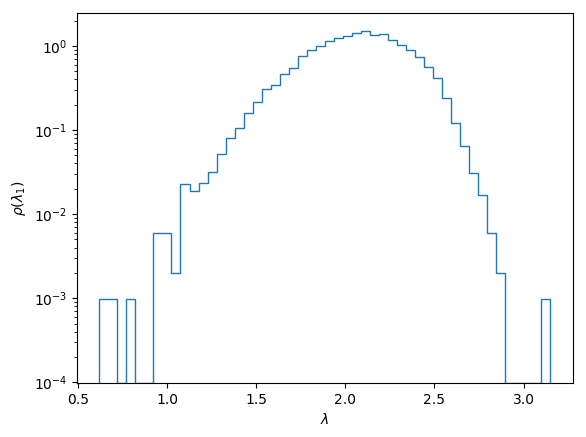

In [33]:
## Histogram
plt[:hist](lyapunov, normed = true, 50, histtype = "step", log = true);
plt[:xlabel](L"$\lambda$")
plt[:ylabel](L"$\rho(\lambda_1)$");

## Comparison

In [34]:
rare = birkres[find(lyapunov .< 1.0),:] #Distance is the third column

15×4 Array{Float64,2}:
 3.78949  -0.398916  2.34198   0.992745
 7.48365  -0.539652  0.373555  0.979991
 6.321     0.466147  0.904201  0.785273
 5.09268   0.505249  0.265321  0.940026
 2.64468   0.59702   1.09785   0.970266
 1.18905  -0.53063   1.33247   0.958791
 5.23794   0.556581  1.20866   0.703324
 4.20472   0.999708  1.89845   0.980641
 4.90695  -0.562423  1.42237   0.953321
 1.41533   0.554891  1.36065   0.957061
 1.59143   0.4774    1.11099   0.999081
 6.71183  -0.500069  4.89185   0.984198
 7.61694  -0.489941  0.698287  0.936635
 6.35781  -0.532775  0.867817  0.979226
 1.29767   0.510683  2.23294   0.619371

We can note that rare events with vanishing Lyapunov exponents have the 
highest values of displacements. It is worth noting that 3 rare values occur at a similar angle